In [2]:
import pandas as pd

- Loading the data

In [3]:
training=pd.read_csv("twitter_training.csv")
test=pd.read_csv("twitter_validation.csv")

In [4]:
training

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
test

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
training.columns = ['id', 'company','labels','text']
test.columns = ['id', 'company','labels','text']

- Delete unneeded columns

In [7]:
training.drop(columns=["id","company"],inplace=True)
test.drop(columns=["id","company"],inplace=True)

In [8]:
training.head()

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [9]:
test.head()

,labels,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


- Concatenating the dataframes

In [10]:
sentiment=pd.concat([training,test],ignore_index=True)
sentiment

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
75675,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,Positive,Today sucked so it’s time to drink wine n play...
75678,Positive,Bought a fraction of Microsoft today. Small wins.


- Check if there is null values

In [11]:
sentiment.isnull().sum()

labels      0
text      686
dtype: int64

- Check if there is NaN values

In [12]:
sentiment.dropna(inplace=True)
sentiment.isnull().sum()

labels    0
text      0
dtype: int64

- Check if there is duplicated values

In [13]:
sentiment.duplicated().sum()

4743

In [14]:
sentiment.drop_duplicates(inplace=True)
sentiment.duplicated().sum()

0

- Emoji and stopword list (English stopwords)

In [15]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

- Preprocessing function

In [16]:
from nltk.stem import WordNetLemmatizer
import re
def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')

        processedText.append(tweetwords)

    return processedText

In [17]:
x=sentiment.drop('labels',axis=1)
y=sentiment.labels

In [18]:
texts=list(x['text'])

In [19]:
import nltk

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\selma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\selma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
cleaned_text = preprocess(texts)

# Clustering

In [24]:
from sklearn.cluster import KMeans

#Define the number of clusters
numclusters = 4

#Convert text data to numerical representation using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(cleaned_text)

#Apply K-Means clustering
kmeans = KMeans(n_clusters=numclusters, random_state=42)
kmeans.fit(X)

#Assign cluster labels to each data point
cluster_labels = kmeans.labels_

#Add cluster labels to the sentiment dataframe
sentiment['cluster'] = cluster_labels

#Display the count of data points in each cluster
print(sentiment['cluster'].value_counts())

for cluster_num in range(numclusters):
    print(f"\nCluster {cluster_num}:")
    cluster_data = sentiment[sentiment['cluster'] == cluster_num]['text']
    print(cluster_data.head())

sse = kmeans.inertia_
print("Sum of Squared Errors (SSE):", sse)

cluster
3    33102
0    23977
1     7511
2     5661
Name: count, dtype: int64

Cluster 0:
0    I am coming to the borders and I will kill you...
1    im getting on borderlands and i will kill you ...
2    im coming on borderlands and i will murder you...
3    im getting on borderlands 2 and i will murder ...
4    im getting into borderlands and i can murder y...
Name: text, dtype: object

Cluster 1:
5    So I spent a few hours making something for fu...
6    So I spent a couple of hours doing something f...
7    So I spent a few hours doing something for fun...
8    So I spent a few hours making something for fu...
9    2010 So I spent a few hours making something f...
Name: text, dtype: object

Cluster 2:
29    WE FINISHED BORDERLANDS 3 FINALLY YAS! Thank y...
33    WE FINISHED BORDERLANDS 3 AND FINALLY YAS! Tha...
77    One of our own @ProfZeroo is live w/ @borderla...
80    One of our own @ProfZeroo is live >/ @borderla...
81    One of our shows own @ProfZeroo is live via w ...
Name

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

- Tokenizing and padding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 40000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


the size of vocab = 26603


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)



- Class Distribution

In [ ]:
y.value_counts()

labels
Negative      21329
Positive      19270
Neutral       17281
Irrelevant    12371
Name: count, dtype: int64

# Model Development

- After long experiments and debuggings we decided to continue via GRU.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense,Input,GlobalMaxPooling1D,Dropout,Bidirectional
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
dimensions=100
x =Input(shape=(maxlen,))

In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001
x=Embedding(v+1,dimensions)(input)
x = Dropout(0.5)(x)
x = Bidirectional(GRU(200))(x)
x = Dense(32, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(input, x)

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)
history = model.fit(X_train, y_train_one_hot, epochs=40, validation_data=(X_test, y_test_one_hot))


Epoch 1/40
1757/1757 [==============================] - 66s 34ms/step - loss: 1.2035 - accuracy: 0.4625 - val_loss: 0.9821 - val_accuracy: 0.6061
Epoch 2/40
1757/1757 [==============================] - 26s 15ms/step - loss: 0.8983 - accuracy: 0.6404 - val_loss: 0.7918 - val_accuracy: 0.6995
Epoch 3/40
1757/1757 [==============================] - 25s 14ms/step - loss: 0.7073 - accuracy: 0.7310 - val_loss: 0.6524 - val_accuracy: 0.7606
Epoch 4/40
1757/1757 [==============================] - 23s 13ms/step - loss: 0.5744 - accuracy: 0.7839 - val_loss: 0.5649 - val_accuracy: 0.7955
Epoch 5/40
1757/1757 [==============================] - 23s 13ms/step - loss: 0.4840 - accuracy: 0.8215 - val_loss: 0.5069 - val_accuracy: 0.8159
Epoch 6/40
1757/1757 [==============================] - 25s 14ms/step - loss: 0.4212 - accuracy: 0.8467 - val_loss: 0.4832 - val_accuracy: 0.8246
Epoch 7/40
1757/1757 [==============================] - 23s 13ms/step - loss: 0.3729 - accuracy: 0.8642 - val_loss: 0.4339 -

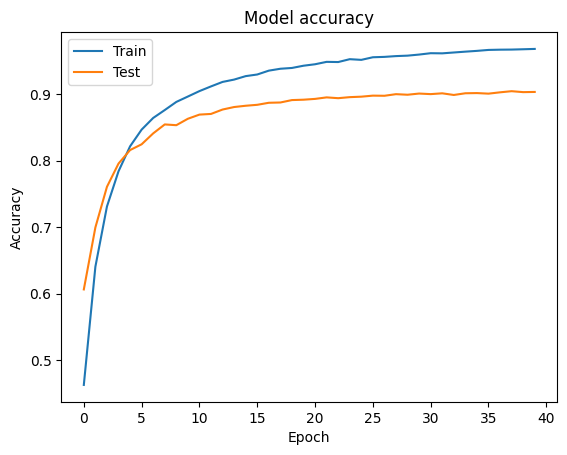

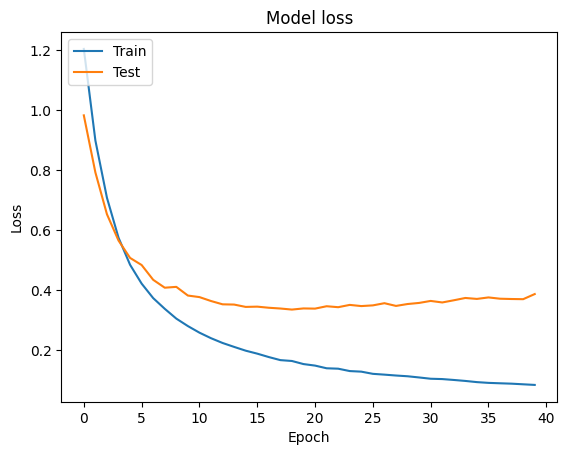

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

440/440 [==============================] - 4s 10ms/step - loss: 0.3864 - accuracy: 0.9034
Test Loss: 0.3864261209964752
Test Accuracy: 0.9033520817756653


440/440 [==============================] - 3s 7ms/step


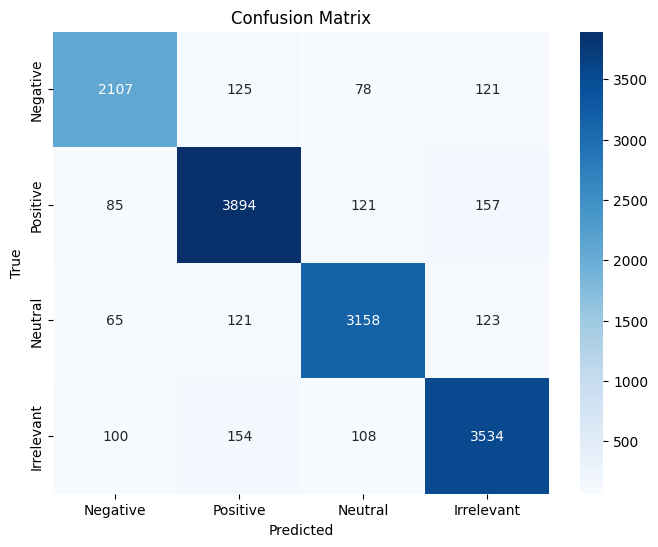

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive', 'Neutral', 'Irrelevant'],
            yticklabels=['Negative', 'Positive', 'Neutral', 'Irrelevant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Saving the model

In [ ]:
model.save("sentiment_analysis_model.keras")